In [2]:
import numpy as np
from matplotlib import pyplot
from numpy.random import normal
from scipy.stats import norm

## Estimación Paramétrica

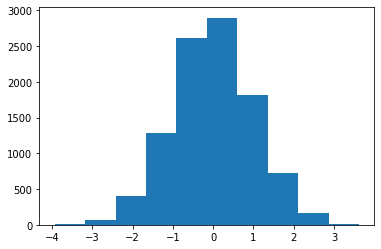

In [5]:
sample = normal(size=10000)
pyplot.hist(sample)
pyplot.show()

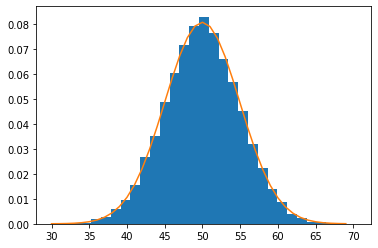

In [16]:
sample= normal(loc=50,scale=5,size=10000) #mu = 50 , sigma=5
#entre mas datos "size" el histograma se vera mas curvo
mu = sample.mean() #promedio de los datos
sigma = sample.std() #desviación estandar de los datos
dist = norm(mu,sigma)
values = [value for value in range(30,70)] #crea los valores
probabilidades = [dist.pdf(value) for value in values]
#crea las probabilidades de los valores
pyplot.hist(sample,bins=30,density=True)
#dibuja el histograma de los datos, con density devuelve las probabilidad
# y no los numeros grandes osea que los normaliza
pyplot.plot(values,probabilidades)
#dibuja la función teorica osea la curva
pyplot.show()

##Estimación no paramétrica

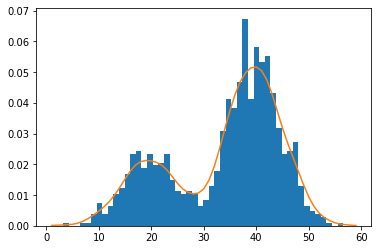

In [18]:
from numpy import hstack
from sklearn.neighbors import KernelDensity

#construimos una distribución bimodal
sample1 = normal(loc=20, scale=5, size=300)
sample2 = normal(loc=40, scale=5, size=700)
sample = hstack((sample1, sample2))#Une los datos

model = KernelDensity(bandwidth=2, kernel='gaussian')
sample = sample.reshape((len(sample), 1))
model.fit(sample)

values = np.asarray([value for value in range(1, 60)])
#Crea los valores
values = values.reshape((len(values), 1))
probabilities = model.score_samples(values)
#calcula las probabilidades logaritimicas ya que es más facil para la compu
probabilities = np.exp(probabilities)
#Nos invierte a las probabilidades originales

pyplot.hist(sample, bins=50, density=True) 
#Dibuja el histograma
pyplot.plot(values, probabilities)#Dibuja las gaussianas
pyplot.show()